<a href="https://colab.research.google.com/github/smrutipunto/OPT/blob/main/opt_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Flower Pollination Algorithm (FPA)
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Objective function: Sphere function
def sphere(x):
    return np.sum(x ** 2)

# Levy Flight
def levy_flight(beta, dim):
    sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
             (gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = np.random.randn(dim) * sigma
    v = np.random.randn(dim)
    step = u / (np.abs(v) + 1e-10) ** (1 / beta)  # Add epsilon to avoid div by zero
    return step

In [ ]:
# Flower Pollination Algorithm
def flower_pollination(n=25, dim=2, max_iter=100, p=0.8, bounds=(-10, 10)):
    population = np.random.uniform(bounds[0], bounds[1], (n, dim))
    fitness = np.array([sphere(x) for x in population])
    best = population[np.argmin(fitness)].copy()
    best_score = np.min(fitness)

    for t in range(max_iter):
        for i in range(n):
            if np.random.rand() < p:
                L = levy_flight(beta=1.5, dim=dim)
                population[i] += L * (best - population[i])
            else:
                j, k = np.random.randint(0, n, 2)
                epsilon = np.random.rand()
                population[i] += epsilon * (population[j] - population[k])
            # Apply bounds
            population[i] = np.clip(population[i], bounds[0], bounds[1])
            f = sphere(population[i])
            if f < fitness[i]:
                fitness[i] = f
                if f < best_score:
                    best = population[i].copy()
                    best_score = f
    return best, best_score, population

Best solution: [-0.00417714 -0.00051928], Fitness: 1.7718120385253136e-05


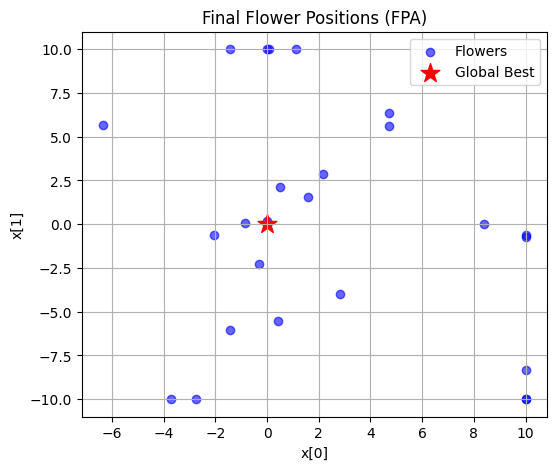

In [ ]:

# Run and plot for 2D case
if __name__ == "__main__":
    best, score, pop = flower_pollination()
    print(f"Best solution: {best}, Fitness: {score}")

    # Plot only if 2D
    if pop.shape[1] == 2:
        plt.figure(figsize=(6, 5))
        plt.scatter(pop[:, 0], pop[:, 1], color='blue', alpha=0.6, label='Flowers')
        plt.scatter(best[0], best[1], color='red', marker='*', s=200, label='Global Best')
        plt.title("Final Flower Positions (FPA)")
        plt.xlabel("x[0]")
        plt.ylabel("x[1]")
        plt.grid(True)
        plt.legend()
        plt.show()